##### Sumber dataset: https://www.kaggle.com/abineshkumark/carsdata/version/1#

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd

pd.set_option("display.max_rows", 500)

In [13]:
df = pd.read_csv('dataset-s2.csv')

In [14]:
# Preprocessing
columns = []

# Terdapat beberapa value yang tidak NaN,namun hanyalah sebuah spasi. Saya akan menggantinya dengan null.
df.replace(" ", np.nan, inplace=True)

# Menghapus spasi pada setiap nama kolom
for column in df.columns:
    columns.append(column.strip(" "))
    
df.columns = columns

# Terdapat beberapa kolom yang nilainya string angka (contoh: '151', '218', dll).
# Saya akan mengganti tipe string tersebut menjadi float
for column in df.columns:
    if column != 'brand':
        df[column] = df[column].astype(float)
 
# Membuang row yang memiliki nilai null
df.dropna(inplace=True)

# Memisahkan data menjadi fitur dan label
features = df.drop('brand', axis=1)
labels = df['brand']


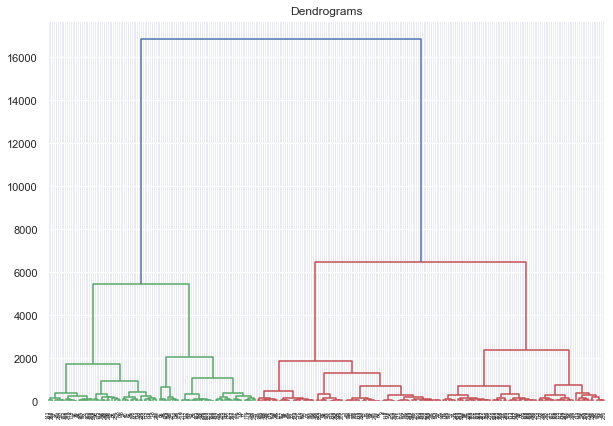

In [26]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dendrogram = shc.dendrogram(shc.linkage(features, method='ward'))

In [ ]:
Tujuan dari melakukan clustering pada data ini adalah untuk mengetahui keterkaitan antar data yang ada, lebih spesifiknya lagi, adalah kemiripannya berdasarkan atribut-atribut yang ada.

Saya tidak begitu banyak mendapatkan insight berdasarkan gambar dendogram yang tercipta, karena datanya terlalu banyak sehingga saya tidak dapat mengetahui data mana yang "diclusterkan" duluan.
Namun, saya mengetahui bahwa tinggi dari link yang menghubungkan dua data menggambarkan kemiripan. Semakin kecil tingginya maka semakin mirip.